<a href="https://colab.research.google.com/github/anirudh2843/Natural-Language-Processing/blob/master/Exploring_Text_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploring Text Data**

In [3]:
import pandas as pd
df=pd.read_csv("tweets.csv");
print(df.shape)

(5157, 14)


In [17]:
import spacy
nlp=spacy.load("en_core_web_sm")
combined_tweets=' '.join(df.text.values)
doc=nlp(combined_tweets)


def gen_freq(tokens):
  word_freq=pd.Series([token.text for token in tokens]).value_counts()
  print(word_freq[:30])
  return word_freq
word_freq=gen_freq(doc)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


#                 5770
demonetization    2540
.                 2313
:                 2029
Demonetization    2022
,                 1734
to                1678
                 1634
the               1604
of                1596
RT                1371
in                1351
\r\n              1286
is                1093
on                 948
a                  834
?                  727
and                716
India              696
!                  671
's                 665
-                  655
for                628
                   543
;                  499
&                  463
I                  454
by                 450
amp                441
are                421
Name: count, dtype: int64


No. of unique words=> 16140


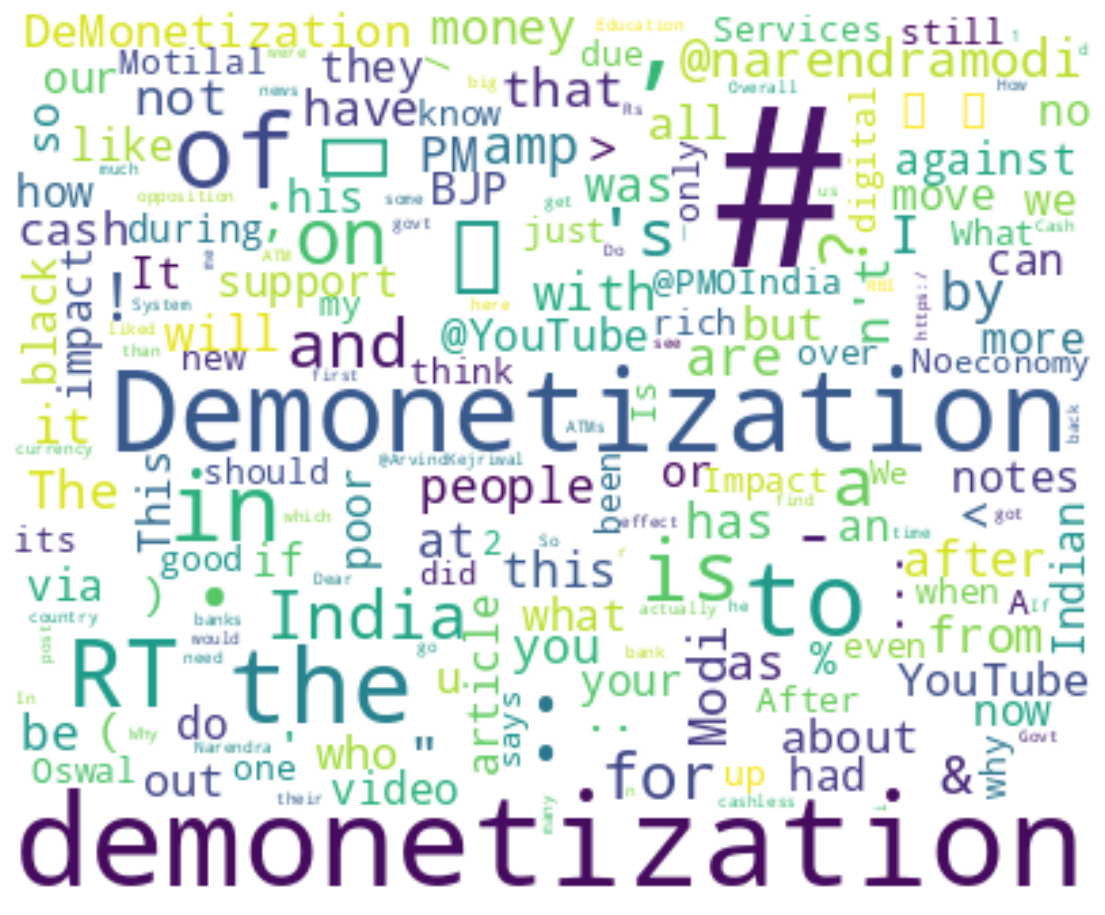

In [20]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function for generating wordcloud
def g(data):
    wc = WordCloud(width=400, height=330, max_words=200,background_color='white').generate_from_frequencies(data)

    # Setting Figure Size
    plt.figure(figsize=(14,12))

    # Display wordcloud as image
    plt.imshow(wc, interpolation='bilinear')

    # Removing all the axes
    plt.axis("off")

    plt.show()


print('No. of unique words=>',len(word_freq))
# Clean the words to remove newlines
word_freq = {word.replace("\n", " "): freq for word, freq in word_freq.items()}


g(word_freq)

demonetization    4818
                  1626
                 1350
\r\n              1284
india              742
amp                441
modi               402
>                  363
<                  352
@narendramodi      339
money              327
people             318
\r\n\r\n           314
pm                 289
cash               285
                  284
youtube            257
impact             190
black              166
like               164
digital            153
@youtube           149
support            147
govt               133
u                  130
bjp                128
poor               127
notes              121
video              119
new                119
Name: count, dtype: int64
No. of unique words=> 13947


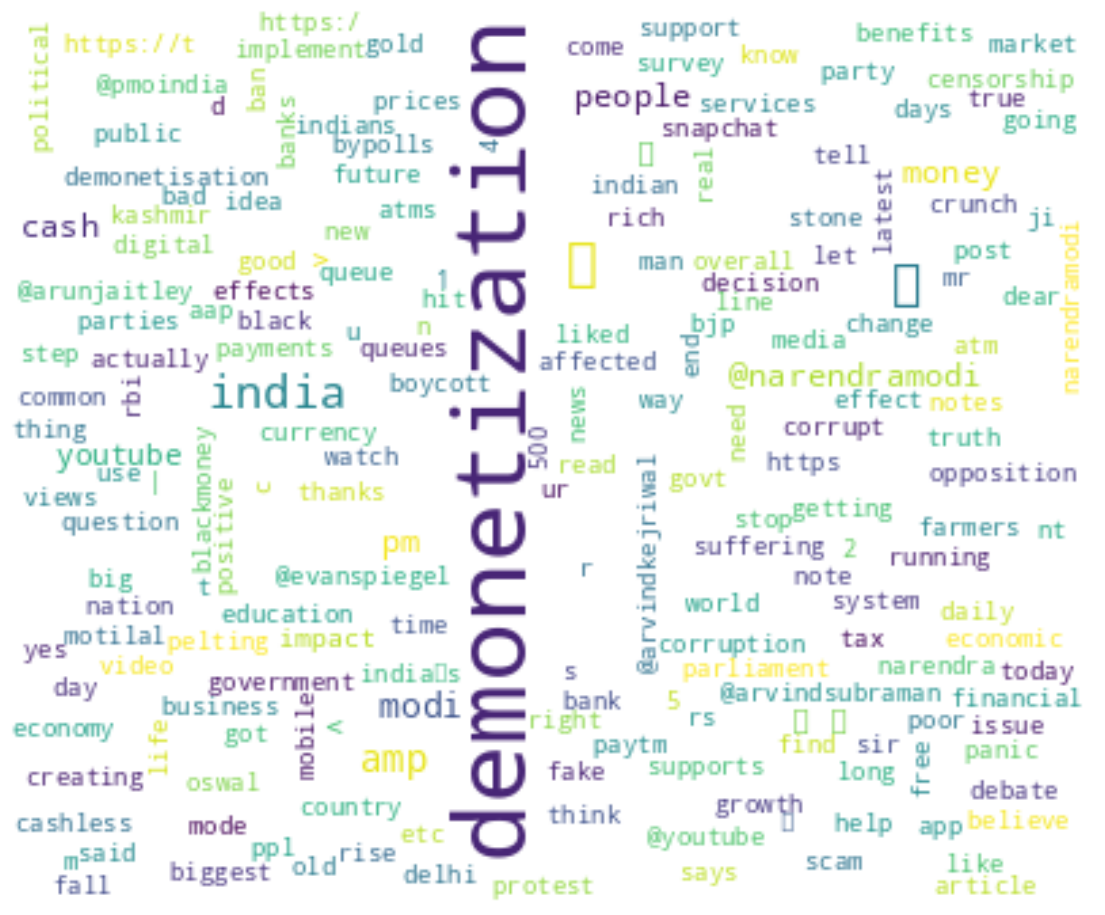

In [25]:
import re

combined_tweets=re.sub('(RT|#)','',combined_tweets)
combined_tweets=combined_tweets.lower()
doc=nlp(combined_tweets)
tokens=[token for token in doc if (token.is_stop==False|token.is_punct==False)]
word_freq=gen_freq(tokens)
print('No. of unique words=>',len(word_freq))
# Generating wordcloud

word_freq = {word.replace("\n", " "): freq for word, freq in word_freq.items()}

generate_wordcloud(word_freq)

demonetization    4822
india              742
modi               402
@narendramodi      339
money              328
people             318
pm                 291
cash               285
youtube            257
impact             190
black              166
like               164
digital            153
@youtube           149
support            147
govt               133
u                  130
bjp                128
poor               127
notes              121
video              119
new                119
indian             119
bank               118
banks              110
good               109
time               106
article            106
@pmoindia          105
economy            104
Name: count, dtype: int64
No. of unique words=> 13906


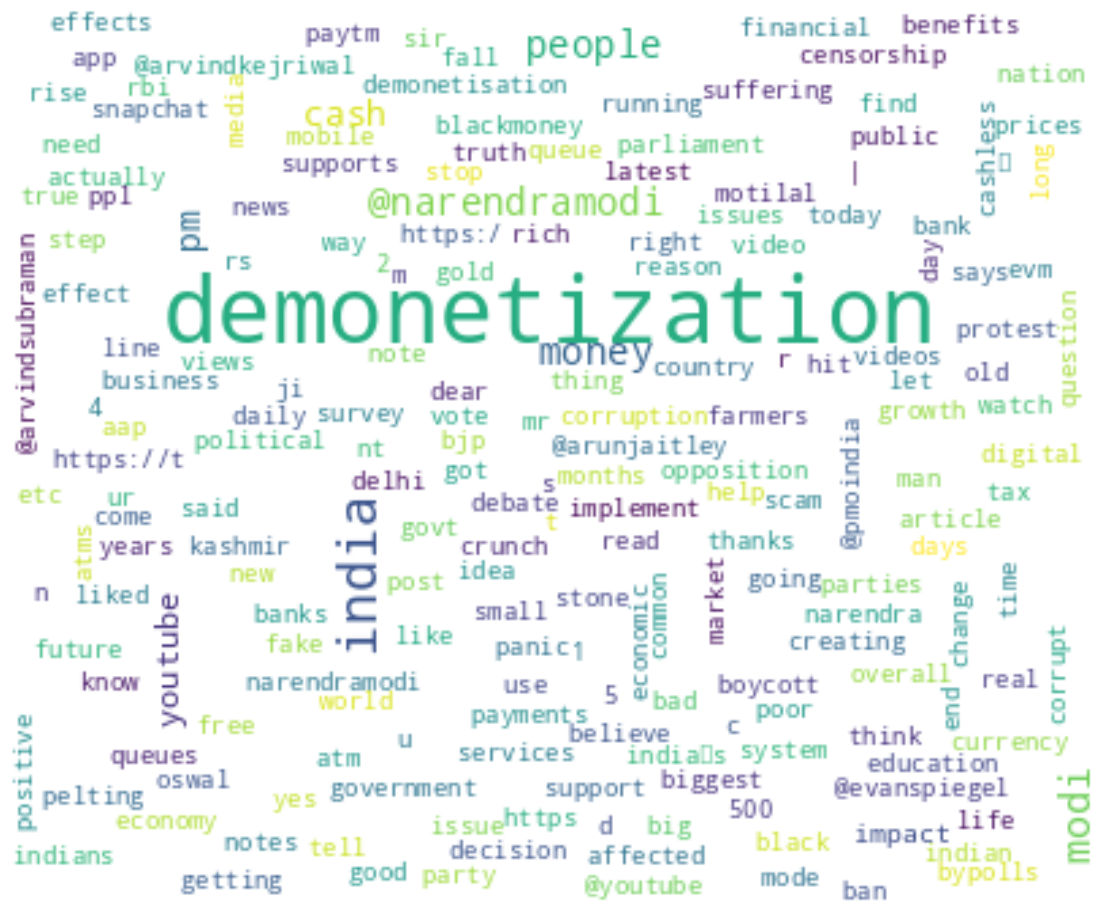

In [27]:
combined_tweets=' '.join([token.text for token in tokens])
combined_tweets=re.sub('(\r\n|amp|<|>)+','',combined_tweets)
# Creating Doc object
doc=nlp(combined_tweets)
# Removing whitespaces
tokens=[token for token in doc if (token.is_space==False)]
# Getting word frequencies
word_freq=gen_freq(tokens)
print('No. of unique words=>',len(word_freq))
# Generating wordcloud
generate_wordcloud(word_freq)

emonetization    4825
:                3119
inia              743
moi               402
money             328
people            319
pm                292
cash              285
youtube           257
like              232
impact            190
black             166
igital            153
support           147
govt              133
.                 131
u                 130
bjp               129
poor              127
notes             122
vieo              120
new               120
inian             119
bank              118
goo               110
banks             110
article           106
time              106
economy           104
rs                 99
Name: count, dtype: int64
No. of unique words=> 10998


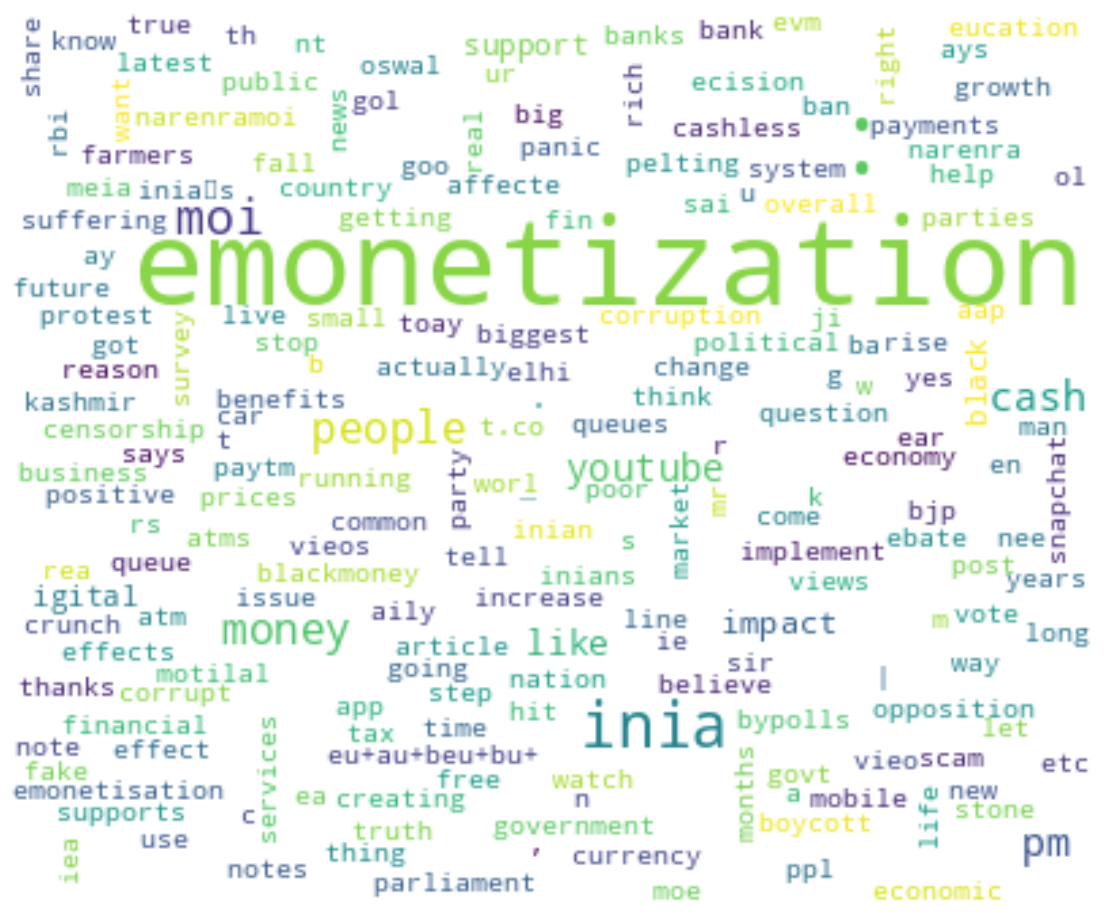

In [38]:
combined_tweets=' '.join([token.text for token in tokens])
combined_tweets=re.sub('@\w+|\d+|https','',combined_tweets)
# Creating Doc object
doc=nlp(combined_tweets)
# Removing whitespaces
tokens=[token for token in doc if (token.is_space==False)]
# Getting word frequencies
word_freq=gen_freq(tokens)
print('No. of unique words=>',len(word_freq))
# Generating wordcloud
generate_wordcloud(word_freq)